##### **<font color='purple'>Encryption Theory Assignment: Using Block-Based Distribution Technique in Least Significant Bit (LSB) steganography</font>**
##### **<font color='purple'>Students' Names: Lina Abureesh, Bailasan Qa'dan</font>**
##### **<font color='purple'>University IDs: 1211985, 1220687</font>**

#### Import Libraries

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import copy

#### Determine block size

In [2]:
block_size = 4

#### load the cover image

In [3]:
img = cv.imread("huffman.png")

In [4]:
img

array([[[178, 183, 175],
        [180, 174, 185],
        [179, 180, 179],
        ...,
        [187, 187, 187],
        [187, 186, 188],
        [187, 185, 188]],

       [[178, 179, 179],
        [177, 178, 178],
        [178, 177, 178],
        ...,
        [186, 186, 186],
        [185, 187, 187],
        [189, 185, 189]],

       [[177, 178, 177],
        [177, 180, 177],
        [176, 178, 176],
        ...,
        [185, 186, 186],
        [184, 187, 186],
        [186, 186, 187]],

       ...,

       [[181, 180, 182],
        [180, 182, 177],
        [181, 181, 179],
        ...,
        [187, 189, 187],
        [187, 190, 187],
        [189, 188, 188]],

       [[173, 170, 201],
        [184, 192, 159],
        [181, 181, 179],
        ...,
        [186, 189, 188],
        [186, 191, 187],
        [188, 189, 189]],

       [[186, 209, 144],
        [196, 151, 220],
        [186, 177, 185],
        ...,
        [192, 187, 192],
        [193, 188, 192],
        [194, 189, 191]]

In [5]:
img.shape

(1024, 1024, 3)

In [6]:
img.reshape(img.shape[0] * img.shape[1], img.shape[2])

array([[178, 183, 175],
       [180, 174, 185],
       [179, 180, 179],
       ...,
       [192, 187, 192],
       [193, 188, 192],
       [194, 189, 191]], dtype=uint8)

In [13]:
img2 = img.reshape(img.shape[0] * img.shape[1] * img.shape[2])
img2

array([178, 183, 175, ..., 194, 189, 191], dtype=uint8)

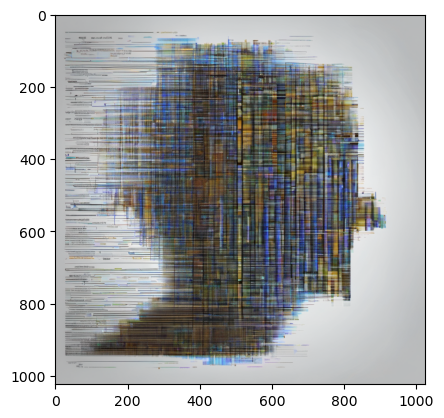

In [12]:
plt.imshow(img2.reshape(img.shape[0], img.shape[1], img.shape[2]))

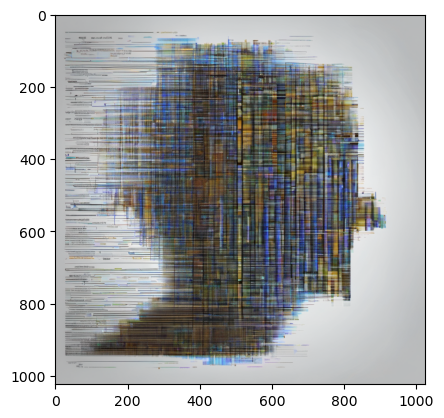

In [5]:
# show the image
plt.imshow(img)

#### Implement a method for embedding a secret message in the cover image

In [6]:
def hideMessage(message, image):
    stegoImg = copy.deepcopy(image)
    bitIndex = 0
    characterIndex = 0
    character_binary_representation = bin(ord(message[characterIndex]))[2:].zfill(8) 
    for block_iteration in range(block_size):
        for channel in [1, 0, 2]: # iterate over channels: green, red, blue
            for i in range(len(img)):
                for pixel in [pixel for pixel in range(len(img[i])) if (pixel - block_iteration) % block_size == 0]:
                    if character_binary_representation[bitIndex] == '1': 
                        stegoImg[i][pixel][channel] = img[i][pixel][channel] | 1;  # if LSB is 1, it remains the same, if it is 0, it changes to 1
                    elif(character_binary_representation[bitIndex] == '0' and img[i][pixel][channel] % 2 != 0): # the LSB is 1 
                        stegoImg[i][pixel][channel] -= 1 # change the LSB from 1 to 0
                    bitIndex += 1; # get the next bit of the character
                    if(bitIndex == 8):
                        characterIndex += 1
                        if(characterIndex == len(message)):
                            return len(message), stegoImg
                        character_binary_representation = bin(ord(message[characterIndex]))[2:].zfill(8) 
                        bitIndex = 0 

#### Implement a method for extracting the secret message from the previously generated stego_image 

In [7]:
def extractSecretMessage(stegoImage, message_len):
    message = ""
    bitNo = 0
    characterNo = 0
    character_binary_representation = ""
    for block_iteration in range(block_size):
        for channel in [1, 0, 2]: # iterate over channels: green, red, blue
            for i in range(len(stegoImage)):
                for pixel in [pixel for pixel in range(len(stegoImage[i])) if (pixel - block_iteration) % block_size == 0]:
                    character_binary_representation += bin(stegoImage[i][pixel][channel])[-1]
                    bitNo += 1; # go to the next bit of the character
                    if(bitNo == 8):
                        message += chr(int(character_binary_representation, 2))
                        characterNo += 1
                        if(characterNo == message_len):
                            return message
                        character_binary_representation = "" 
                        bitNo = 0

#### Methods' Testing:

##### 1- Ask the user to type the secret message to be embedded in the cover image

In [8]:
maxLength = (img.shape[0] * img.shape[1] * img.shape[2]) / 8
message = input(f"Please enter a sentence ({maxLength} character at most): ")

Please enter a sentence (393216.0 character at most):  Birzeit University   Computer Science Department   Encryption Theory (Comp 438)   Assignment One   Prepared by:   Bailasan Mezher Qa'dan                                     Lina Qasem Abureesh                                         Instructor: Mohammad Alkhanafseh  Date: October, 30th, 2024  ID: 1220687  ID: 1211985  I    Table of Contents  Table of Figures ............................................................................................................................... II  LSB Algorithm ................................................................................................................................ 2  Chosen Distribution Technique: Block-Based Distribution ............................................................ 3  Impact of Distribution Technique on Detectability ......................................................................... 3  Mechanism of Action .......................................

##### 2- Hide the secret message in the cover image

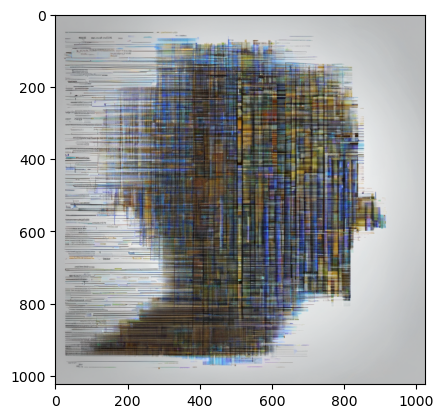

In [9]:
if(len(message) > maxLength):
    print("Input exceeds maximum character limit")
else:
    messgae_len, stegoImage = hideMessage(message, img)
    plt.imshow(stegoImage) # show the stego image

In [10]:
# save the stego image 
plt.imsave('stegoImg.png', stegoImage)

##### 3- Extract the secret message from the stego image

In [11]:
extractSecretMessage(stegoImage, len(message))

"Birzeit University   Computer Science Department   Encryption Theory (Comp 438)   Assignment One   Prepared by:   Bailasan Mezher Qa'dan                                     Lina Qasem Abureesh                                         Instructor: Mohammad Alkhanafseh  Date: October, 30th, 2024  ID: 1220687  ID: 1211985  I    Table of Contents  Table of Figures ............................................................................................................................... II  LSB Algorithm ................................................................................................................................ 2  Chosen Distribution Technique: Block-Based Distribution ............................................................ 3  Impact of Distribution Technique on Detectability ......................................................................... 3  Mechanism of Action .............................................................................................

#### Visual comparison between original cover image and stego image:

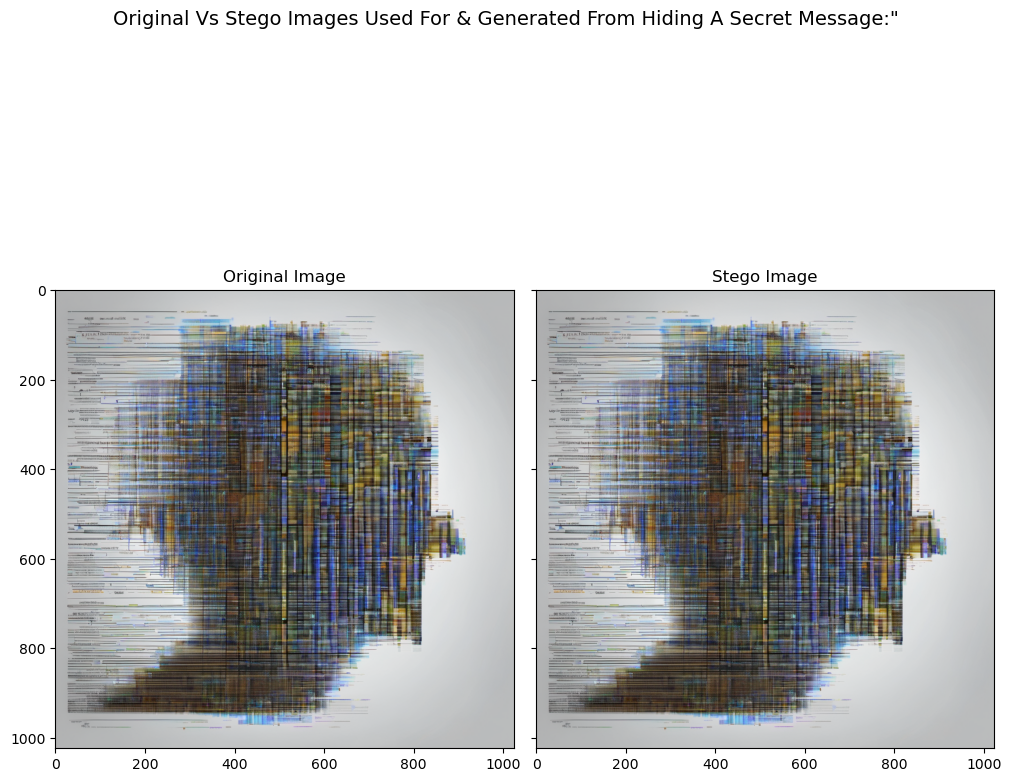

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10), sharey=True, constrained_layout=True)
fig.suptitle(f'Original Vs Stego Images Used For & Generated From Hiding A Secret Message:"', fontsize=14)
axes[0].imshow(img)
axes[0].set_title("Original Image");
axes[1].imshow(stegoImage)
axes[1].set_title("Stego Image");
plt.show()
# print(f"Embedded Message: {message}")